# Netflix Visualizations, Recommendation, EDA🍿
## [Kaggle Kernel 필사]((https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda/notebook#Content-in-France)

넷플릭스는 쇼, 콘텐츠로 점점 더 빠르게 성장하는 아주 인기있는 App이다.    
본 포스트에서는 콘텐츠 기반 추천 시스템 및 광범위하고 다양한 그래프 및 시각화 자료를 통한 EDA로 얻은 데이터 인사이트를 설명하고 있다. 


Please Upvote if you like the notebook 😀and share possible improvements in the comments.

![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

## Load Library

In [1]:
import numpy as np # linear algebra
# 데이터 전처리 및 CSV 파일 입출력 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the Dataset

In [3]:
base_path = f'/content/drive/MyDrive/Netflix_Recommendation'

df = pd.read_csv(f'{base_path}/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
len(df.columns)

12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


- 12개 칼럼과 각 데이터 

In [6]:
df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

NAN값도 포함되어져 있다. 

## EDA


### Analysis of Movies vs TV Shows.

In [7]:
df_TV = df[df['type'] == 'TV Show']
df_movies = df[df['type']=='Movie']

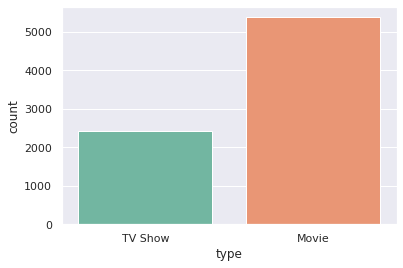

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data = df, palette="Set2")

- TV Show 시청률은 조금 저조한 편 
    - 드라마보다는 영화를 좀 더 선호한다 

### If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

#### 드라마가 가장 인기 있었던 해 

In [9]:
df[['date_added']].head()

,date_added
0,"August 14, 2020"
1,"December 23, 2016"
2,"December 20, 2018"
3,"November 16, 2017"
4,"January 1, 2020"


In [10]:
df_date = df_TV[['date_added']].dropna()
df_date['year'] = df_date['date_added'].apply(lambda x : x.split(', ')[-1])
df_date['month'] = df_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_order

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [12]:
date = df_date.groupby('year')['month'].value_counts().unstack()
date

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0
2014,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2015,4.0,NaN,7.0,1.0,NaN,3.0,3.0,2.0,2.0,2.0,5.0,1.0
2016,8.0,17.0,44.0,7.0,29.0,10.0,8.0,3.0,4.0,18.0,18.0,19.0
2017,29.0,38.0,39.0,18.0,14.0,34.0,30.0,38.0,25.0,31.0,32.0,33.0
2018,31.0,34.0,64.0,24.0,22.0,30.0,28.0,38.0,28.0,41.0,46.0,44.0
2019,50.0,53.0,50.0,46.0,39.0,67.0,48.0,60.0,49.0,77.0,73.0,44.0
2020,58.0,61.0,74.0,46.0,64.0,53.0,48.0,56.0,64.0,55.0,56.0,62.0


In [13]:
date = date.fillna(0)[month_order].T
date

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0


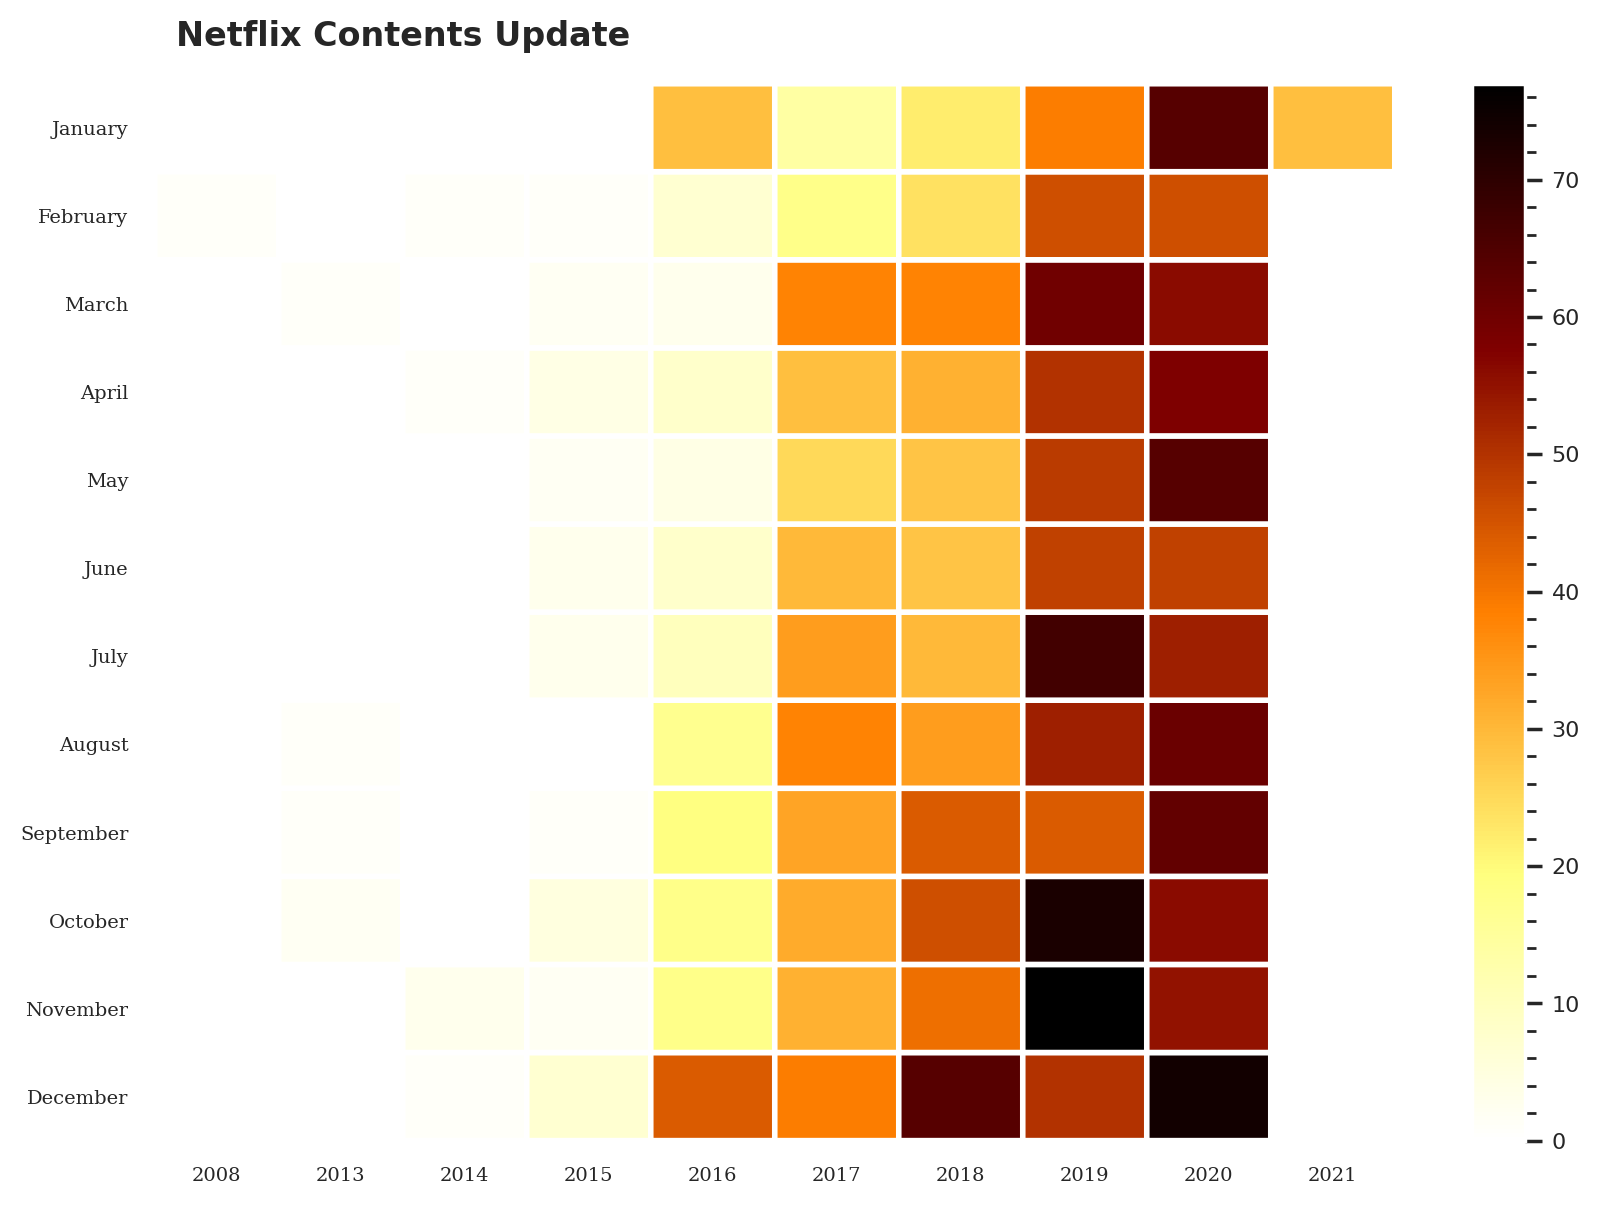

In [14]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(date, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(date.columns), 1), date.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(date.index), 1), date.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

2019년에서 2020년의 드라마 콘텐츠 공급이 매우 활발히 이루어졌음을 알 수 있었다 ! 
- 한국의 경우 킹덤 시즌 1~2 / 좋아하면 울리는 / 나홀로그대 / 인간수업 / 보건교사안은영 / 스위트홈 ... 21년 오징어게임까지 코로나 19로 인해 이불콕 넷플릭스 시청자가 엄청 많았었다 ! 

### Movie Ratings Analysis

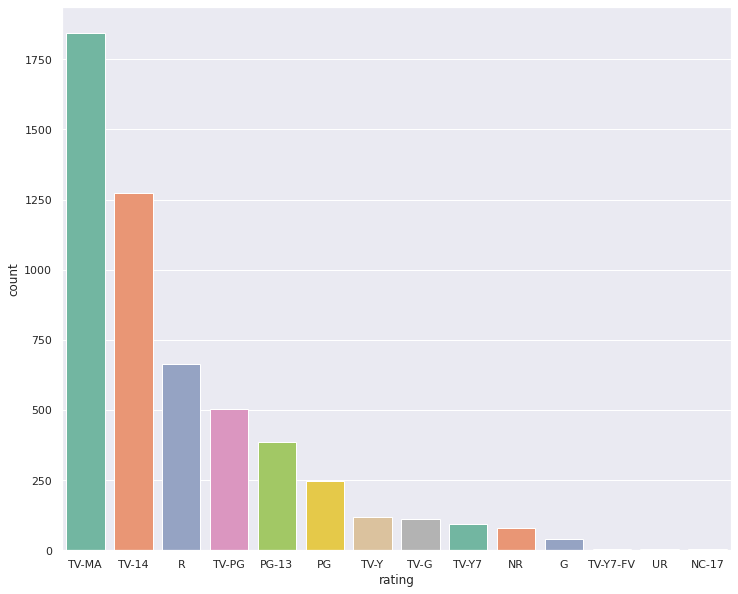

In [15]:
plt.figure(figsize = (12, 10))
sns.set(style = 'darkgrid')
ax = sns.countplot(x="rating", data = df_movies, palette="Set2", order= df_movies['rating'].value_counts().index[0:15])

##### Countplot이란?

- Seaborn 중 Categoricla APi에서 대표적인 시각화 방법
범주를 이산적으로 세서 막대 그래프로 그려주는 함수

**order** : Feature의 순서를 정렬 
- 범주형 차트 같은 경우 순서가 매우 중요함! 따라서, 범주(Feature) 순서 조정 방법을 꼭 익혀야 함
- Category를 어떤 식으로 Sorting할지 결정

**hue** : 
- 그래프를 내가 원하는 Feature를 기준으로 나눌 때 활용
    - hue_order : Feature 값에 따른 Order을 위해 활용하는 Paramaeter

**ax** :    
- 그리고 싶은 ax를 지정하는 Parameter       

**palette** :     
- Group(Hue Feature)에 대한 색을 칠할 때 - 미리 정해진 색으로 칠하는 Parameter      

**color** :     
- Sequential Colormap의 색을 활용해 Group을 칠하는 Parameter   

#### INSIGHT 
가장 인기가 많았던 프로그램들의 심의 등급 
- TV-MA는 지침에 의해 규정된 성인 시청자 등급 
- TV-14 는 14세 미만 어린이에게 부적절함 
- R 17세 미만 어린이에게 적합하지 않음

### Analysing IMDB ratings to get top rated movies on Netflix


In [16]:
imdb_ratings=pd.read_csv(f'{base_path}/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv(f'{base_path}/IMDb movies.csv', usecols=['title','year','genre'])


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
imdb_ratings.head()

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0


In [18]:
imdb_titles.head()

,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
2,Den sorte drøm,1911,Drama
3,Cleopatra,1912,"Drama, History"
4,L'Inferno,1911,"Adventure, Drama, Fantasy"


In [19]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})

ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [20]:
ratings.head()

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"


In [21]:
ratings.isnull().mean()

Title           0.0
Release Year    0.0
Rating          0.0
Genre           0.0
dtype: float64

#### Title 기준으로 Merge 

In [22]:
ratings.dropna()

joint_data = ratings.merge(df,left_on='Title',right_on='title',how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

IMDB 데이터를 통해 Netflix에서 사용할 수 있는 콘텐츠를 얻기 위해 Rating 데이터 세트와 Netflix 데이터 세트에서 inner join을 수행

In [23]:
joint_data.head(2)

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
991,Innocent,2017,9.0,Comedy,s3009,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1002,Breakout,2019,9.0,"Adventure, Comedy, Drama",s1093,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...


#### Top rated 10 movies on Netflix are:

In [24]:
import plotly.express as px

top_rated=joint_data[0:10]

fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

####  Countries with Highest rated content 

In [25]:
country = joint_data['country'].value_counts().sort_values(ascending=False)
country = pd.DataFrame(country)

In [26]:
country[0:11]['country'].index.tolist()

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'Philippines',
 'Spain',
 'South Korea',
 'Indonesia',
 'France',
 'United Kingdom, United States',
 'Australia']

In [27]:
country[0:11]['country'].values.tolist()

[799, 701, 107, 56, 50, 40, 36, 35, 33, 31, 30]

In [28]:
import plotly.express as px

data_cntry = dict(
    number=country[0:11]['country'].values.tolist(),
    country=country[0:11]['country'].index.tolist())
fig = px.funnel(data_cntry, x='number', y='country')

fig.show()

#### Year wise analysis

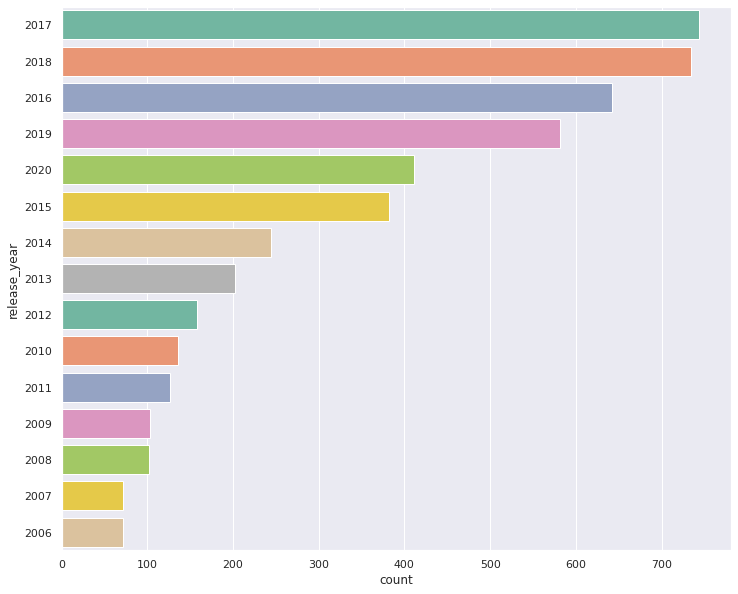

In [29]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data= df_movies, palette="Set2", 
                   order=df_movies['release_year'].value_counts().index[0:15])

- 2016 ~ 2018 년도가 가장 핫했다 

In [30]:
countries={}

df_movies['country'] = df_movies['country'].fillna('Unknown')
cou=list(df_movies['country'])

for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

<ipython-input-30-21ee642b3e25>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

### TOP 10 MOVIE CONTENT CREATING COUNTRIES

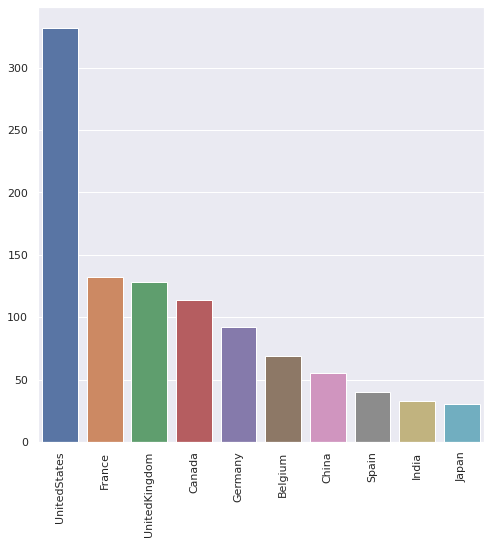

In [32]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10]);
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90);

### Analysis of duration of movies

In [33]:
df_movies['duration'] = df_movies['duration'].str.replace(' min','')
df_movies['duration'] = df_movies['duration'].astype(str).astype(int)
df_movies['duration']

<ipython-input-33-4b2fd9a6d6ec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-4b2fd9a6d6ec>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

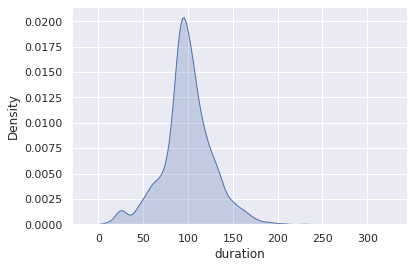

In [34]:
sns.set(style="darkgrid")
sns.kdeplot(data=df_movies['duration'], shade=True)

In [35]:
from collections import Counter

genres=list(df_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

g

Counter({'Dramas': 2106,
         'InternationalMovies': 2437,
         'HorrorMovies': 312,
         'Action&Adventure': 721,
         'IndependentMovies': 673,
         'Sci-Fi&Fantasy': 218,
         'Thrillers': 491,
         'Documentaries': 786,
         'SportsMovies': 196,
         'Comedies': 1471,
         'RomanticMovies': 531,
         'Movies': 56,
         'Music&Musicals': 321,
         'LGBTQMovies': 90,
         'Faith&Spirituality': 57,
         'Children&FamilyMovies': 532,
         'ClassicMovies': 103,
         'CultMovies': 59,
         'Stand-UpComedy': 329,
         'AnimeFeatures': 57})

### WordCloud for Genres.

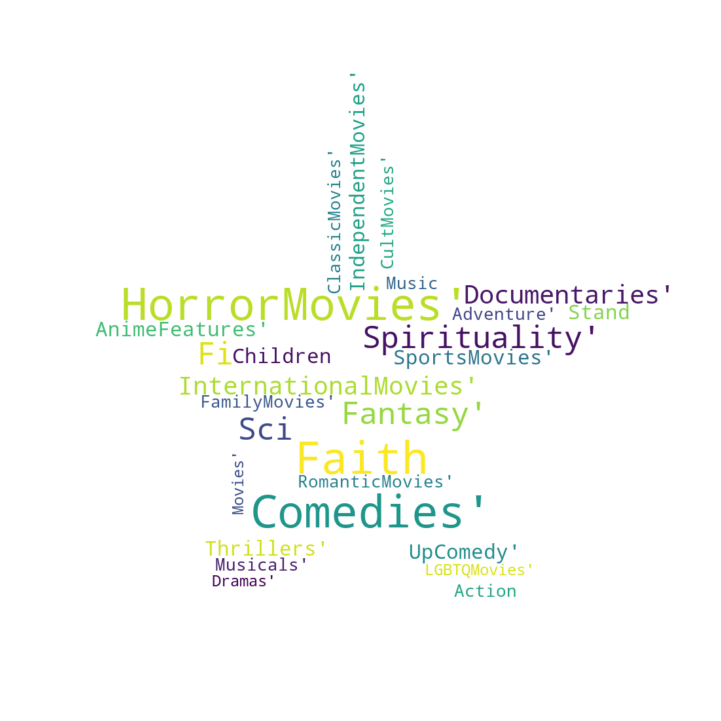

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
mask = np.array(Image.open(f'{base_path}/masks-wordclouds/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Lollipop plot of Genres vs their count on Netflix

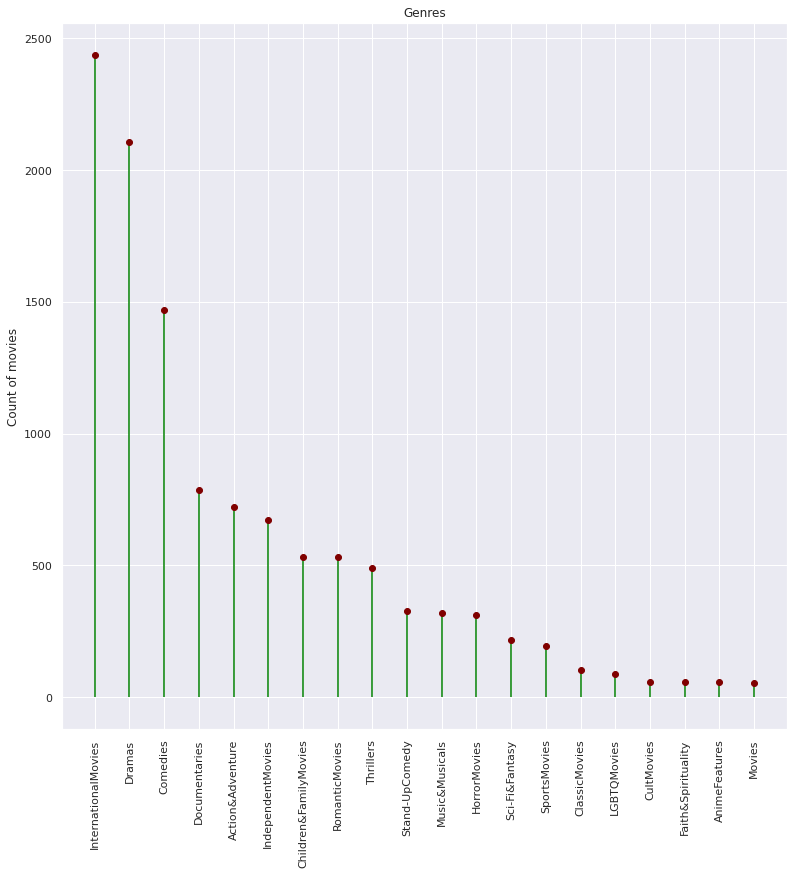

<Figure size 720x720 with 0 Axes>

In [37]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())


ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')

ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

- 넷플릭스에서 콘텐츠 장르 3대장은 국제 영화, 드라마, 코미디

### Analysis of TV SERIES on Netflix

In [38]:
countries1={}
df_TV['country']=df_TV['country'].fillna('Unknown')
cou1=list(df_TV['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

<ipython-input-38-50e1e3e374c5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}
countries_fin1

{'UnitedStates': 85,
 'Canada': 44,
 'France': 26,
 'Japan': 23,
 'UnitedKingdom': 21,
 'Germany': 19,
 'Mexico': 10,
 'Spain': 9,
 'Australia': 9,
 'Italy': 8,
 'China': 8,
 'Ireland': 8,
 'NewZealand': 7,
 'SouthKorea': 6,
 'SouthAfrica': 6,
 'Colombia': 6,
 'CzechRepublic': 6,
 'Singapore': 4,
 'Finland': 4,
 'Netherlands': 4,
 'Belgium': 4,
 'Sweden': 4,
 'Brazil': 3,
 'India': 3,
 'Russia': 3,
 'Denmark': 3,
 'HongKong': 3,
 'Poland': 2,
 'Lebanon': 2,
 'Argentina': 2,
 'Chile': 2,
 'Egypt': 2,
 'Kuwait': 2,
 'Israel': 2,
 'Indonesia': 2,
 'Malaysia': 2,
 'Greece': 2,
 'WestGermany': 2,
 'Turkey': 1,
 'Unknown': 1,
 'Taiwan': 1,
 'Mauritius': 1,
 'Philippines': 1,
 'Thailand': 1,
 'Nigeria': 1,
 'SaudiArabia': 1,
 'Syria': 1,
 'Norway': 1,
 'Iceland': 1,
 'Cuba': 1,
 'Austria': 1,
 'Pakistan': 1,
 'Luxembourg': 1,
 'Jordan': 1,
 'Uruguay': 1,
 'Azerbaijan': 1,
 'PuertoRico': 1,
 'Malta': 1,
 'Senegal': 1,
 'Ukraine': 1,
 'Switzerland': 1,
 'Belarus': 1,
 'Cyprus': 1,
 'Hungary': 1

### Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

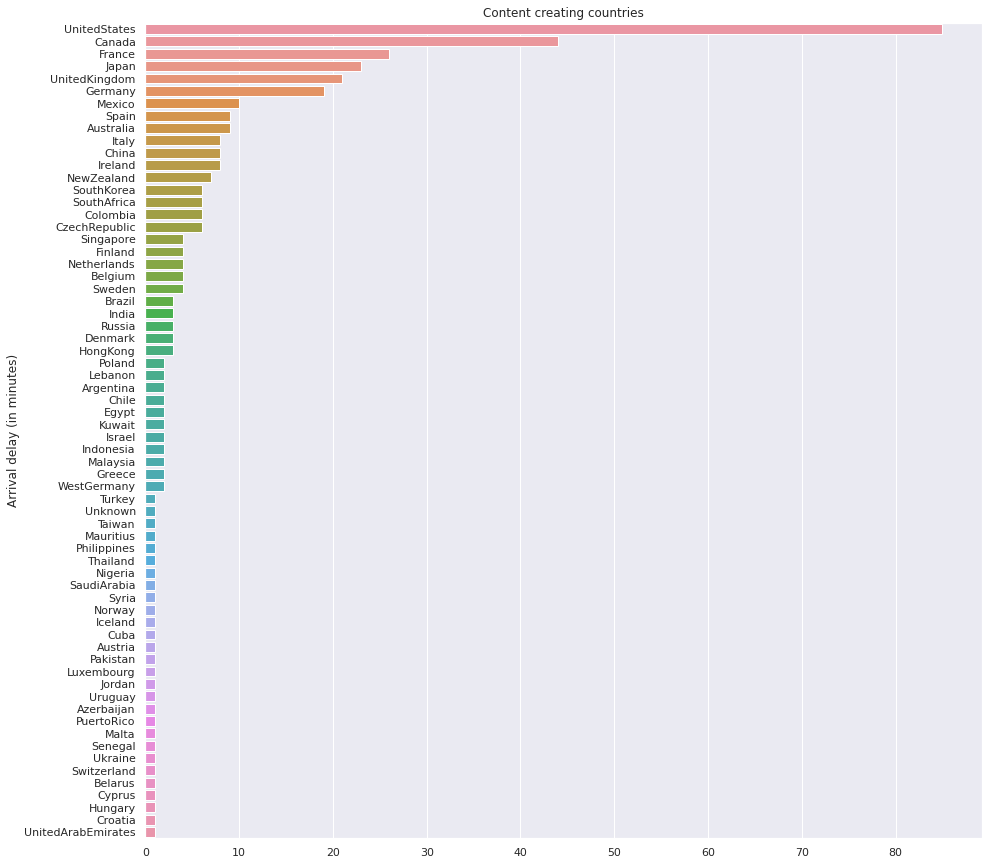

In [40]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

- 미국의 경우 넷플릭스에서 만들어진 콘텐츠가 TV 시리즈의 많은 부분 차지 


In [41]:
features=['title','duration']
durations= df_TV[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

<ipython-input-41-95e0c8ce840c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-95e0c8ce840c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

<ipython-input-42-ad93769c4198>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### TV shows with largest number of seasons

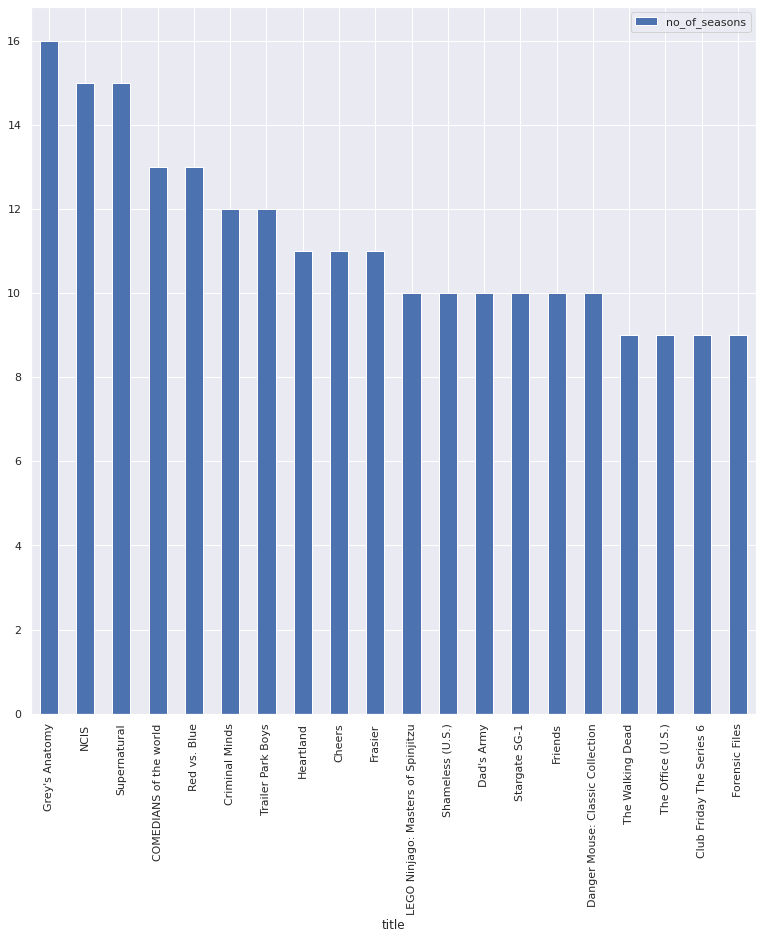

In [43]:
t=['title','no_of_seasons']
top=durations[t].sort_values(by='no_of_seasons', ascending=False)[:20]

top.plot(kind='bar',x='title',y='no_of_seasons')

- 시즌 수가 많은 TV 시리즈는 
NCIS, Grey's Anatomy, Supernatural

### Lowest number of seasons

In [44]:
bottom=durations[t].sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

### Word Cloud for Genres

In [46]:
gen[50:60]

['InternationalMovies',
 'Dramas',
 'InternationalMovies',
 'RomanticMovies',
 'Dramas',
 'InternationalMovies',
 'RomanticMovies',
 'Comedies',
 'Comedies',
 'RomanticMovies']

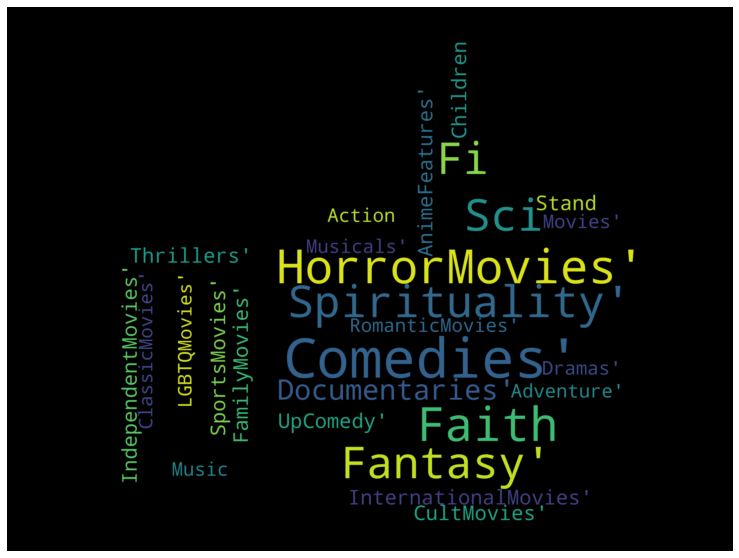

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
mask=np.array(Image.open(f'{base_path}/masks-wordclouds/upvote.png'))

wordcloud = WordCloud(max_words=1000000,mask=mask).generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
korea_series_data=df_TV[df_TV['country']=='South Korea']
oldest_us_series=korea_series_data.sort_values(by='release_year')[0:20]

In [56]:
fig = go.Figure(data=[
                go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='paleturquoise'),
                         cells=dict(values=[oldest_us_series['title'],
                                           oldest_us_series['release_year']],
                                           fill_color='pink'))
                     ])
fig.show()

- Iris... !    
- 뽀로로도 있네.. ! 

In [58]:
newest_us_series = korea_series_data.sort_values(by='release_year', ascending=False)[0:50]


In [59]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                          fill_color='yellow'),
                               cells=dict(values=[newest_us_series['title'],
                                          newest_us_series['release_year']],
                                          fill_color='lavender'))
                     ])
fig.show()

- 괴담?
- 병원 플레이리스트는 대체 뭐지 ...??
- 이태원클라스, 스타트업, 더 킹도 있다 !  

In [67]:
netflix_kr= df[df['country']=='South Korea']
nannef=netflix_kr.dropna()

import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                        color='director', 
                        hover_data=['director','title'],
                        color_continuous_scale='magma')
fig.show()

- '지옥' 의 연상호 감독 
- '응답하라','슬기로운' 시리즈의 신원호 감독

- 컬러맵
```
import plotly.express as px
from textwrap import wrap
```
```
named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))
```

```
aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv         icefire     phase       twilight    mrybm       mygbm
```


In [71]:
newest_kr_series=netflix_kr.sort_values(by='release_year', ascending=False)[0:20]
newest_kr_series.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
5294,s5295,TV Show,Rugal,NaN,"Choi Jin-hyuk, Park Sung-woong, Cho Dong-hyuk,...",South Korea,"March 29, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Korean...",A police detective who loses everything to a c...
2461,s2462,TV Show,Goedam,Hong Won-ki,"SEOLA, Lee Hyun-joo, Song Chae-yun, Han Ga-rim...",South Korea,"August 20, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries","When night falls on the city, shadows and spir..."
2509,s2510,TV Show,Graceful Friends,NaN,"Yu Jun-sang, Song Yoon-a, Bae Soo-bin, Kim Sun...",South Korea,"November 12, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When a sudden death brings everyone’s dirty se...


In [72]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_kr_series['title'],
                                    newest_kr_series['release_year']]))
                     ])
fig.show()

### Top Duration

In [73]:
top_dirs =pd.value_counts(df['duration'])
fig = go.Figure([go.Bar(x=top_dirs.index, 
                        y=top_dirs.values , 
                        text=top_dirs.values,
                        marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [ ]:
# It can be inferred that having one season is the most preferred duration.
# 한 시즌을 가장 선호하는 것 같다 

## Recommendation System (Content Based)

### 추천시스템
- 콘텐츠 기반 추천시스템 
```
TF-IDF(Term Frequency-Inverse Document Frequency, TF-IDF) 점수
: 문서에서 발생하는 단어의 빈도로, 발생하는 문서 수에 따라 가중치를 낮춘다. 
Plot Overview를 통해 **자주 발생하는 단어의 중요성**을 줄이고 
최종 유사성 점수를 계산하는 데 있어 단어의 중요성을 감소시킨다. .
```

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
# 줄거리인가 !? -> 넷플릭스에서 공개하고있는 설명 
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [75]:
df[['description']].head()

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...


이 데이터 세트에는 6234개의 영화에 대해 설명된 약 16151개의 단어가 포함되어있다.

각 단어들의 유사도를 구하기 위해 보통은 코사인 유사도 점수를 사용하는데 크기와 무관하고 비교적 쉽고 계산이 빠르다.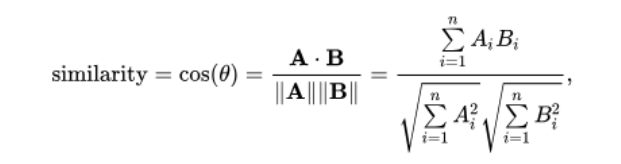

In [76]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices.head()

title
3%       0
7:19     1
23:59    2
9        3
21       4
dtype: int64

In [78]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [79]:
get_recommendations('Mortel')

4858                  PILI Fantasy: War of Dragons
1920         Edgar Rice Burroughs' Tarzan and Jane
2159                             Figures of Speech
4314    My Entire High School Sinking Into the Sea
2188                                     FirstBorn
4994                                 Psychokinesis
608                                 At First Light
6958                          The Umbrella Academy
1267                                     Chamatkar
3864                              Maharakshak Devi
Name: title, dtype: object

In [80]:
get_recommendations('#Alive')

840           Berlin Syndrome
7393       Varane Avashyamund
2483                Good Luck
1161              Cabin Fever
6742       The Parole Officer
6798                 The Rain
1448               Code Lyoko
3658     Little Dragon Maiden
75                        1BR
3871    Main aurr Mrs. Khanna
Name: title, dtype: object

모형이 성능은 좋지만 정확하지는 않다는 것을 알 수 있었다.
더 많은 메트릭을 모델에 추가하여 성능을 올려보자 ! 

### Content based filtering on multiple metrics

Content based filtering on the following factors: ( 다음 요소에 기반한 내용 필터링)

Title   
Cast   
Director   
Listed in   
Plot    

#### 빈 문자열로 null 값 채우기 

In [81]:
filledna=df.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [82]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [83]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


#### Creating a "soup" or a "bag of words" for all rows.

In [84]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [85]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

####  count vectorizer

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [87]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [88]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [89]:
get_recommendations_new('PK', cosine_sim2)

100                    3 Idiots
1757             Dil Chahta Hai
5954           Taare Zameen Par
5377                      Sanju
4276            Mumbai Cha Raja
3120                     Janaan
2692              Hello Brother
4485                   No Entry
3093    Jaane Tu... Ya Jaane Na
507             Andaz Apna Apna
Name: title, dtype: object

In [90]:
get_recommendations_new('#Alive', cosine_sim2)

4398                                         Nang Nak
840                                   Berlin Syndrome
5386                                     Santo Cachón
3274                                             Kaal
2902    I Am the Pretty Thing That Lives in the House
4993                                           Psycho
6275                              The Day of the Lord
3300                                           Kanika
3565                                           Lechmi
3001                                     Inhuman Kiss
Name: title, dtype: object

In [91]:
get_recommendations_new('Itaewon Class', cosine_sim2)

2714              Hi Bye, Mama!
5458              Secret Affair
1105         Bring It On, Ghost
5130            Record of Youth
2880              Hymn of Death
1518       Crash Landing on You
4353          My Secret Romance
5799                   Start-Up
5264    Romance is a bonus book
1070          Boys Over Flowers
Name: title, dtype: object

### How many Netflix Shows/ Movies are made from books as their storylines?

콘텐츠 및 협업 필터링이 모두 포함된 자세한 도서 추천 시스템을 보려면: [도서 추천, EDA](https://www.kaggle.com/code/niharika41298/netflix-vs-books-recommender-analysis-eda?scriptVersionId=42386991)를 클릭하십시오.

In [96]:
books = pd.read_csv(f'{base_path}/books.csv')
books['original_title'] = books['original_title'].str.lower()

x= df.copy()
x['title']=x['title'].str.lower()
t=x.merge(books, left_on='title', right_on='original_title', how="inner")

In [97]:
t.shape

(289, 35)

In [98]:
import plotly.graph_objects as go

# 원작 소설 기반이냐 아니냐 
labels = ['Shows from books','Shows not from books']
values = [248,6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

넷플릭스 쇼/영화들 중 원작 소설 스토리라인을 가져와 구성된 작품이 얼마나 있는지를 알 수 있었다. 
- 